In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import os
import matplotlib.pyplot as plt

In [2]:
start_year = 2012
end_year = 2016
start = pd.datetime(start_year, 1, 1)
end = pd.datetime(end_year, 12, 31)
code = 'AJL.AX'
code_dat = web.DataReader(code, 'yahoo', start, end)

In [3]:
close_price = code_dat.loc[:, 'Close']

In [4]:
rolling5 = close_price.rolling(window=5)
std5 = rolling5.std()

In [5]:
rolling10 = std5.rolling(window=10)
avg10 = rolling10.mean()

In [6]:
vi = std5 / avg10

In [7]:
td = (14 / vi).fillna(-1).astype(int).reset_index()

In [8]:
up = (close_price - close_price.shift(1)).dropna()
down = (close_price.shift(1) - close_price).dropna()

In [9]:
up = up.where(up>0, 0)
down = down.where(down>0, 0)

In [28]:
res = {'date': [], 'rs': []}

In [29]:
for ind, val in td.iterrows():
    if val.Close != -1:
        if val.Close > 30:
            val.Close = 30
        elif val.Close < 3:
            val.Close = 3
        start_ind = (ind - val.Close) if ind - val.Close > 0 else 0
        res['date'].append(val.Date)
        res['rs'].append(up.iloc[start_ind:ind+1].sum()/down.iloc[start_ind:ind+1].sum())

In [30]:
rs = pd.DataFrame(res).set_index('date')

In [31]:
rs.head()

,rs
date,
2012-01-19,4.999438
2012-01-20,5.082865
2012-01-23,5.416198
2012-01-24,3.822946
2012-01-25,3.822946


In [32]:
dmi = 100 - 100/(1+rs)

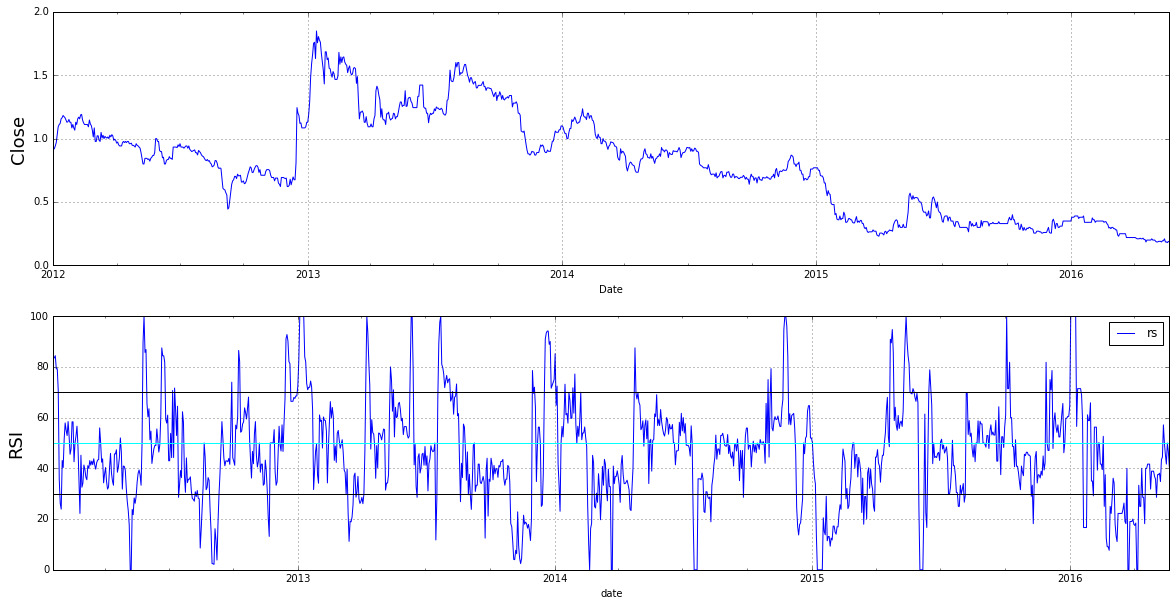

In [33]:
plt.figure(figsize=(20, 10))
ax_up = plt.subplot(211)
close_price.plot(ax=ax_up)
ax_up.set_ylabel('Close', fontsize=18)
plt.grid()
ax_down = plt.subplot(212)
dmi.plot(ax=ax_down)
ax_down.set_ylabel('RSI', fontsize=18)
plt.ylim((0, 100))
x_lim = ax_down.get_xlim()
plt.plot(x_lim, (50, 50), color='cyan')
plt.plot(x_lim, (30, 30), color='k')
plt.plot(x_lim, (70, 70), color='k')
plt.grid()

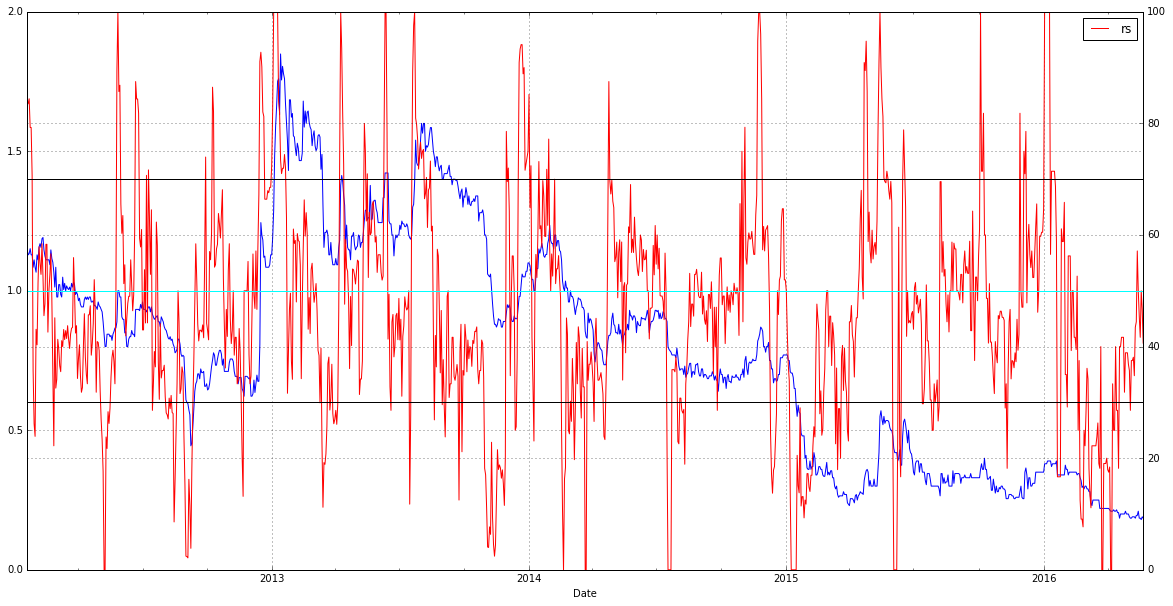

In [37]:
plt.figure(figsize=(20, 10))
ax_left = plt.subplot(111)
close_price.plot(ax=ax_left)
plt.grid()
ax_right = ax_left.twinx()
dmi.plot(ax=ax_right, color='r')
plt.ylim((0, 100))
x_lim = ax_right.get_xlim()
plt.plot(x_lim, (50, 50), color='cyan')
plt.plot(x_lim, (30, 30), color='k')
plt.plot(x_lim, (70, 70), color='k')
plt.grid()